In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
train_df = pd.read_csv("../input/train.csv")
test_df = pd.read_csv("../input/test.csv")
sub_df = pd.read_csv("../input/sample_submission.csv")

In [3]:
train_df.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,44,93,15.4,1,0.8,19,13,17,0,1


In [4]:
test_df.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,159256,40,165,70,84.0,1.2,1.2,1,1,130,...,186,49,115,14.2,1,0.9,19,25,32,0
1,159257,80,160,60,93.0,1.0,1.0,2,2,144,...,158,35,104,13.0,1,1.1,20,12,24,0
2,159258,60,170,70,86.5,0.6,0.7,1,1,117,...,173,39,88,15.4,1,1.4,38,60,36,0
3,159259,40,160,50,67.0,0.3,0.4,1,1,116,...,47,75,128,14.5,1,0.6,25,18,10,1
4,159260,40,170,75,89.4,1.0,0.9,1,1,132,...,100,39,123,16.5,1,1.0,30,39,27,1


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   159256 non-null  int64  
 1   age                  159256 non-null  int64  
 2   height(cm)           159256 non-null  int64  
 3   weight(kg)           159256 non-null  int64  
 4   waist(cm)            159256 non-null  float64
 5   eyesight(left)       159256 non-null  float64
 6   eyesight(right)      159256 non-null  float64
 7   hearing(left)        159256 non-null  int64  
 8   hearing(right)       159256 non-null  int64  
 9   systolic             159256 non-null  int64  
 10  relaxation           159256 non-null  int64  
 11  fasting blood sugar  159256 non-null  int64  
 12  Cholesterol          159256 non-null  int64  
 13  triglyceride         159256 non-null  int64  
 14  HDL                  159256 non-null  int64  
 15  LDL              

In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106171 entries, 0 to 106170
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   106171 non-null  int64  
 1   age                  106171 non-null  int64  
 2   height(cm)           106171 non-null  int64  
 3   weight(kg)           106171 non-null  int64  
 4   waist(cm)            106171 non-null  float64
 5   eyesight(left)       106171 non-null  float64
 6   eyesight(right)      106171 non-null  float64
 7   hearing(left)        106171 non-null  int64  
 8   hearing(right)       106171 non-null  int64  
 9   systolic             106171 non-null  int64  
 10  relaxation           106171 non-null  int64  
 11  fasting blood sugar  106171 non-null  int64  
 12  Cholesterol          106171 non-null  int64  
 13  triglyceride         106171 non-null  int64  
 14  HDL                  106171 non-null  int64  
 15  LDL              

In [7]:
train_cols = train_df.columns 
test_cols = test_df.columns

In [8]:
black_sheep = train_df.columns.difference(test_df.columns)
print("The column in train_df but not in test_df is:", list(black_sheep))

The column in train_df but not in test_df is: ['smoking']


In [9]:
train_df['smoking'].unique()

array([1, 0])

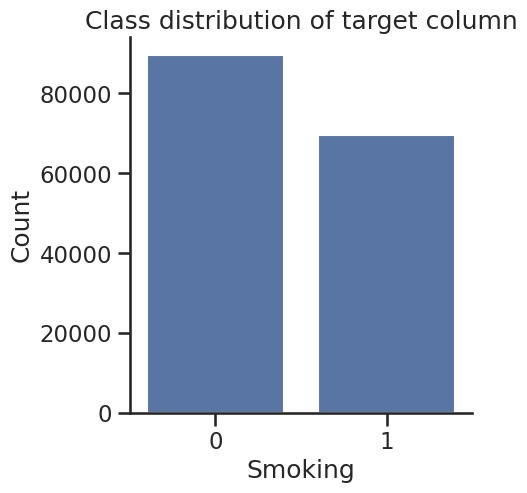

In [10]:
sns.set(style="ticks", context="talk")
g = sns.catplot(x="smoking", data=train_df, kind="count")
g.set_axis_labels("Smoking", "Count")
plt.title("Class distribution of target column")
plt.show()

In [11]:
train_df.select_dtypes('object')

""
0
1
2
3
4
...
159251
159252
159253
159254


In [12]:
all_cols = train_df.columns.tolist()[:-3]
alls = list(train_df[all_cols])

numeric_cols = train_df.select_dtypes('integer').columns

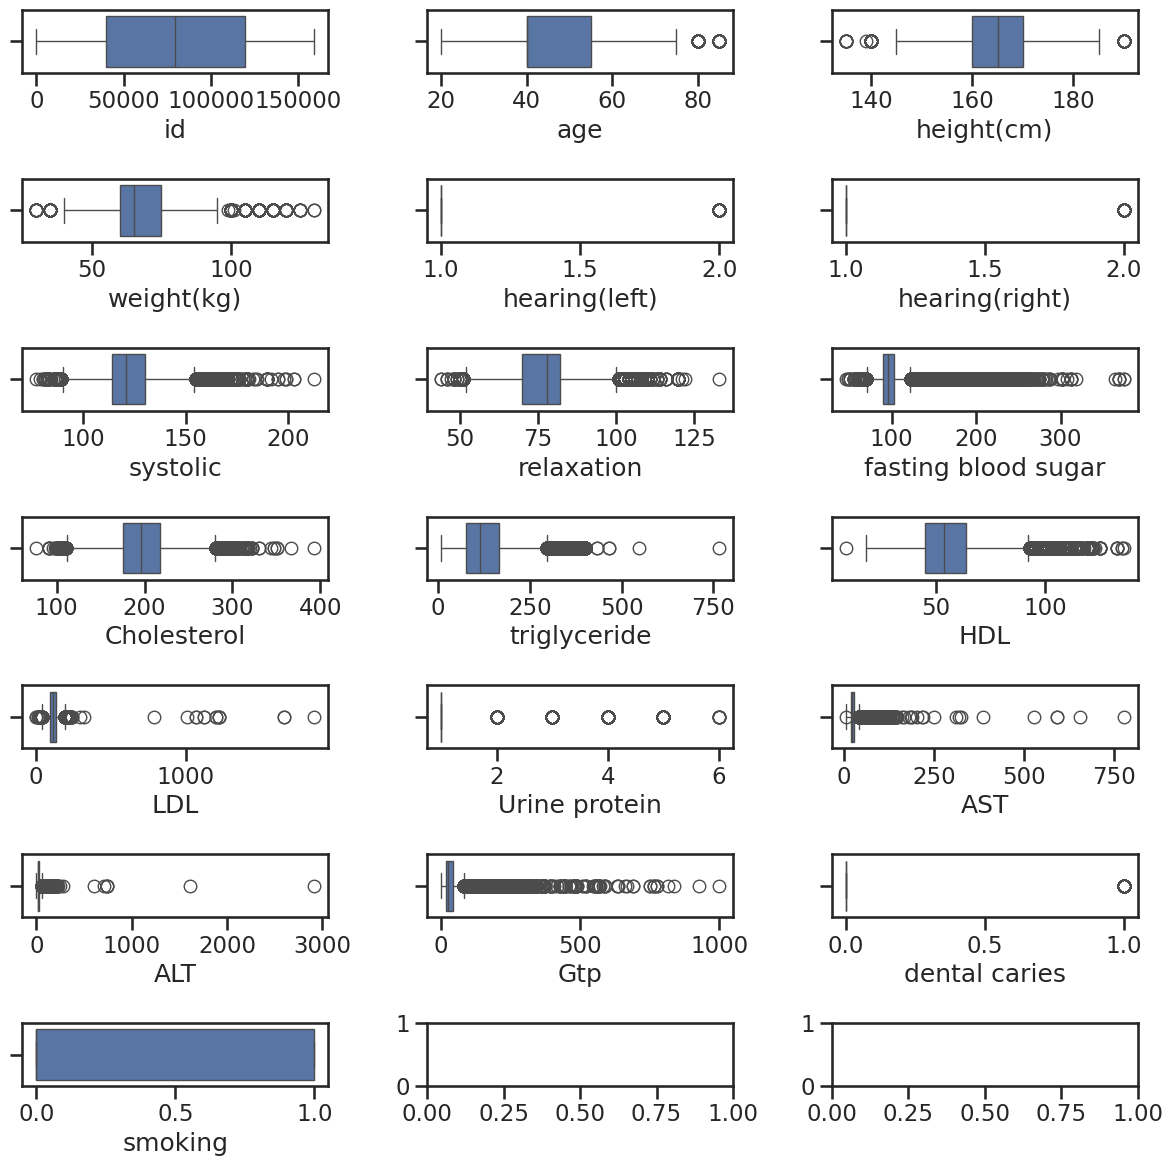

In [14]:
rows = int(np.ceil(len(numeric_cols) / 3))
fig, ax = plt.subplots(rows, 3, figsize=(12, 12))
ax = ax.flatten()

for i, column in enumerate(numeric_cols): 
    sns.boxplot(x=train_df[column], ax=ax[i])

plt.tight_layout()

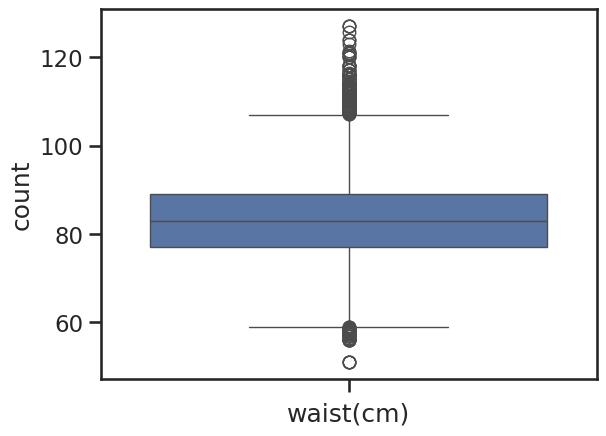

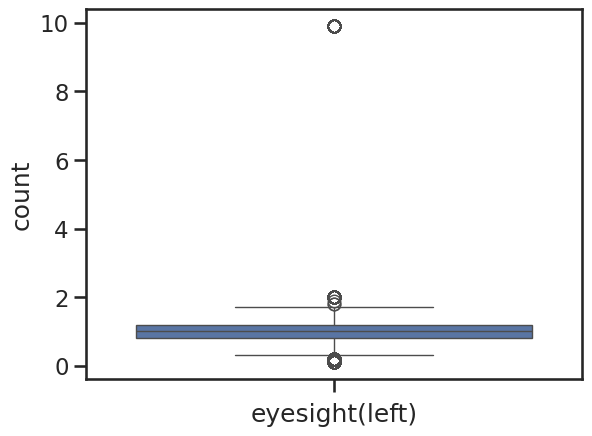

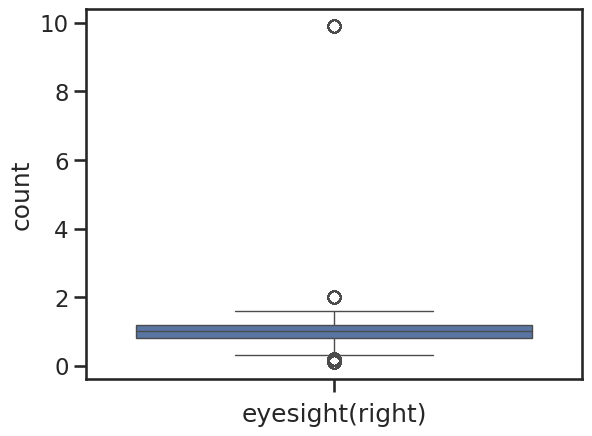

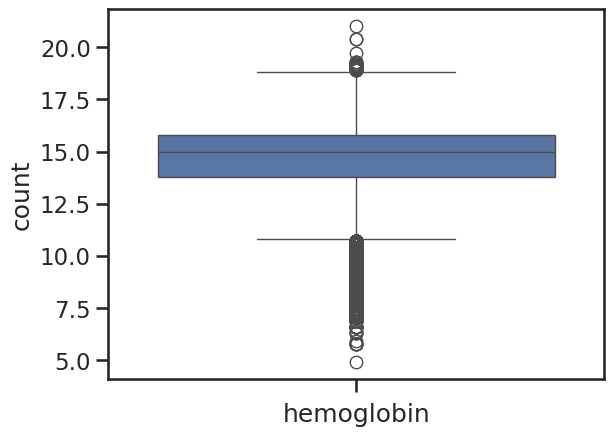

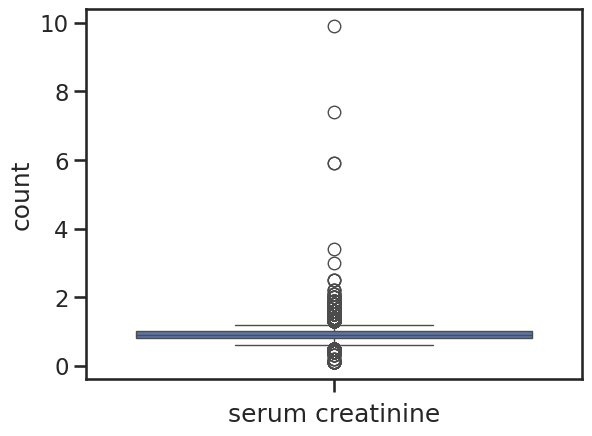

In [15]:
for col in all_cols:
    if train_df[col].dtype == 'float64':
        sns.boxplot(train_df[col])
        plt.xlabel(col)
        plt.ylabel('count')
        plt.show()

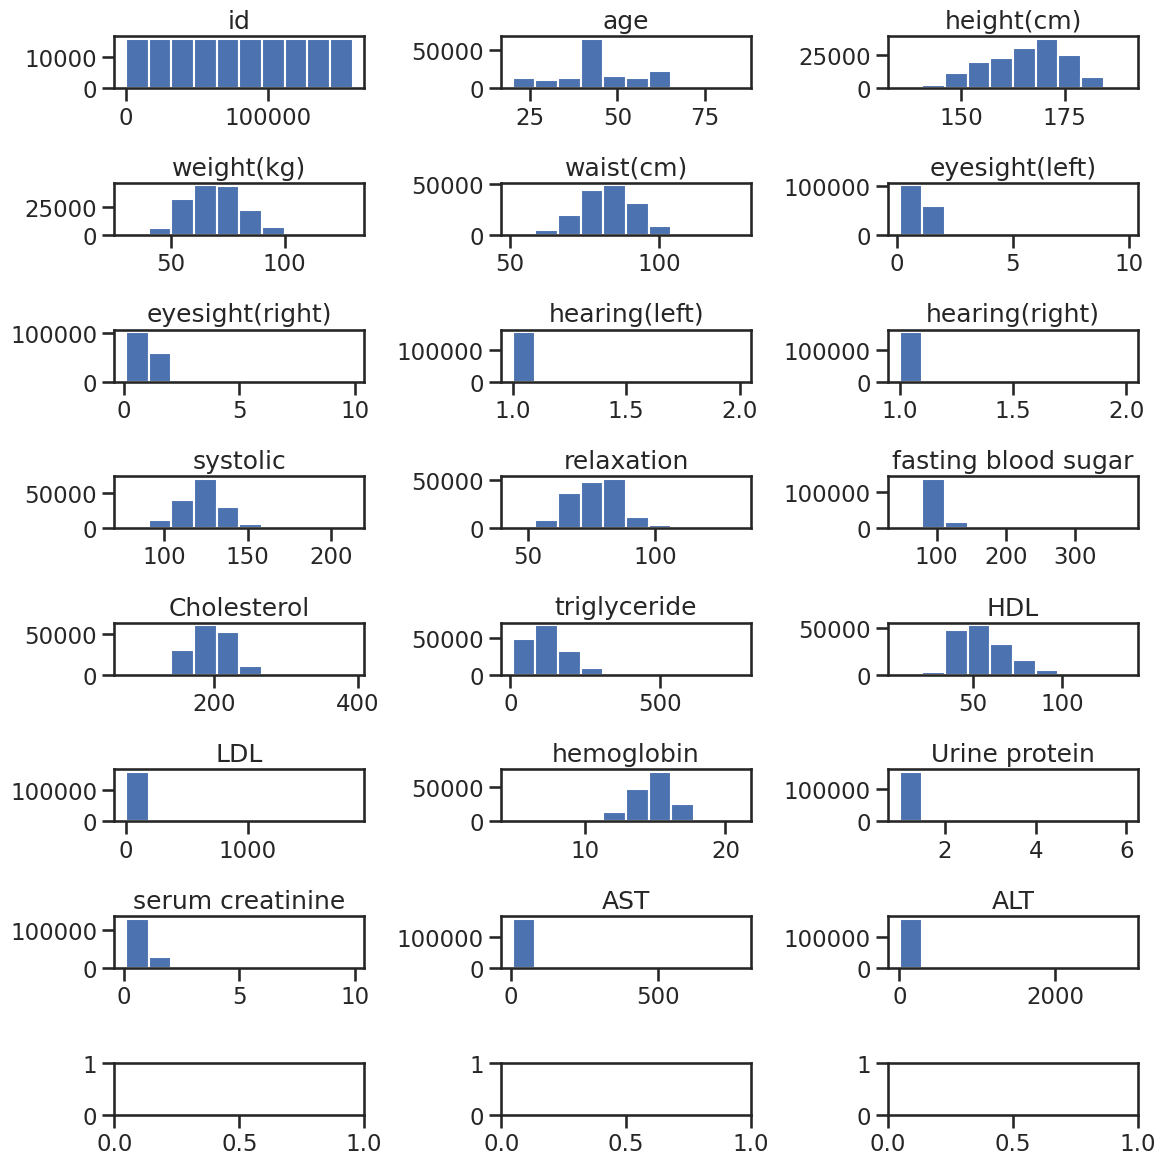

In [16]:
fig, ax = plt.subplots(int((len(alls)/3))+1, 3, figsize = (12, 12))
ax = ax.flatten()

for i, column in enumerate(alls):  
    ax[i].hist(train_df[column])
    ax[i].set_title(column)
    
plt.tight_layout()

In [17]:
train_df[all_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
id,159256.0,79627.500000,45973.391572,0.0,39813.75,79627.5,119441.25,159255.0
age,159256.0,44.306626,11.842286,20.0,40.00,40.0,55.00,85.0
height(cm),159256.0,165.266929,8.818970,135.0,160.00,165.0,170.00,190.0
weight(kg),159256.0,67.143662,12.586198,30.0,60.00,65.0,75.00,130.0
waist(cm),159256.0,83.001990,8.957937,51.0,77.00,83.0,89.00,127.0
eyesight(left),159256.0,1.005798,0.402113,0.1,0.80,1.0,1.20,9.9
eyesight(right),159256.0,1.000989,0.392299,0.1,0.80,1.0,1.20,9.9
hearing(left),159256.0,1.023974,0.152969,1.0,1.00,1.0,1.00,2.0
hearing(right),159256.0,1.023421,0.151238,1.0,1.00,1.0,1.00,2.0
systolic,159256.0,122.503648,12.729315,77.0,114.00,121.0,130.00,213.0


In [ ]:
def view_cat_target_feature_corr(
    df: pd.DataFrame,
    feature: str,
    target: str,
    is_numeric: bool=False,
    bins: int|list|None=None,
    labels: list|None=None
) -> pd.DataFrame:
    
    df = df[[feature, target]].copy()
    df = df[df[target].isna()==False]
    if is_numeric:
        if isinstance(bins, int) and bins>=2:
            if labels is None:
                labels = [i for i in range(bins)]
            else:
                if len(labels) > bins:
                    labels = labels[:bins]
                elif len(labels) < bins:
                    add_labels = [i for i in range(len(labels), bins)]
                    labels += add_labels
            df[f'cut_of_{feature}'] = pd.cut(df[feature], bins=bins, labels=labels)
        elif isinstance(bins, list) and len(bins)>=3:
            num_bins = len(bins) - 1
            if labels is None:
                labels = [i for i in range(num_bins)]
            else:
                if len(labels) > num_bins:
                    labels = labels[:num_bins]
                elif len(labels) < num_bins:
                    add_labels = [i for i in range(len(labels), num_bins)]
                    labels += add_labels
            df[f'cut_of_{feature}'] = pd.cut(df[feature], bins=bins, labels=labels)
        else:
            num_bins = 10
            if labels is None:
                labels = [i for i in range(num_bins)]
            else:
                if len(labels) > num_bins:
                    labels = labels[:num_bins]
                elif len(labels) < num_bins:
                    add_labels = [i for i in range(len(labels), num_bins)]
                    labels += add_labels
            df[f'cut_of_{feature}'] = pd.cut(df[feature], bins=bins, labels=labels)
    else:
        df[f'cut_of_{feature}'] = df[feature]
    
    feature_dict = dict()
    total = df[f'cut_of_{feature}'].value_counts()
    view_idx = df[target].value_counts().index.tolist()
    for idx in view_idx:
        label = df[df[target]==idx][f'cut_of_{feature}'].value_counts()
        feature_dict[idx] = label/total*100
    
    out_df = pd.DataFrame(feature_dict, columns=view_idx)
    return out_df

In [19]:
view_cat_target_feature_corr(train_df, 'age', 'smoking', is_numeric=True, bins=6)

,0,1
cut_of_age,,
0,44.810510,55.189490
1,49.350867,50.649133
2,58.571053,41.428947
3,69.072387,30.927613
4,77.603545,22.396455
5,85.995086,14.004914


In [23]:
view_cat_target_feature_corr(train_df, 'height(cm)', 'smoking', is_numeric=True, bins=6)

,0,1
cut_of_height(cm),,
0,97.374702,2.625298
1,96.916608,3.083392
2,83.546484,16.453516
3,41.059769,58.940231
4,35.175712,64.824288
5,37.585563,62.414437


In [28]:
view_cat_target_feature_corr(train_df, 'weight(kg)', 'smoking', is_numeric=True, bins=6)

,0,1
cut_of_weight(kg),,
0,93.728387,6.271613
1,76.320795,23.679205
2,44.590217,55.409783
3,35.723697,64.276303
4,31.117397,68.882603
5,27.192982,72.807018


## Feature Engineering

In [31]:
train_df['BMI'] = train_df['weight(kg)'] / ((train_df['height(cm)']/100)**2)
train_df['ratio_height_waist'] = train_df['height(cm)'] / train_df['waist(cm)']

In [33]:
train_df[['BMI', 'ratio_height_waist']].describe()

,BMI,ratio_height_waist
count,159256.000000,159256.000000
mean,24.452825,2.010004
std,3.368651,0.201650
min,11.718750,1.259843
25%,22.222222,1.868557
50%,24.221453,2.000000
75%,26.159334,2.134146
max,45.785640,3.333333


In [35]:
view_cat_target_feature_corr(train_df, 'BMI', 'smoking', is_numeric=True, bins=6)

,0,1
cut_of_BMI,,
0,61.477833,38.522167
1,64.897730,35.102270
2,51.694425,48.305575
3,48.793535,51.206465
4,44.527596,55.472404
5,52.631579,47.368421


In [36]:
view_cat_target_feature_corr(train_df, 'ratio_height_waist', 'smoking', is_numeric=True, bins=4)

,0,1
cut_of_ratio_height_waist,,
1,54.477830,45.522170
0,59.279031,40.720969
2,68.131411,31.868589
3,60.869565,39.130435


In [38]:
train_df['eyesight(left)'] = train_df['eyesight(left)'].clip(0,2.2)
train_df['eyesight(right)'] = train_df['eyesight(right)'].clip(0,2.2)

In [39]:
view_cat_target_feature_corr(train_df, 'eyesight(left)', 'smoking', is_numeric=True, bins=5)

,0,1
cut_of_eyesight(left),,
2,53.133445,46.866555
1,62.274077,37.725923
3,46.050070,53.949930
0,68.546434,31.453566
4,46.242775,53.757225


In [40]:
view_cat_target_feature_corr(train_df, 'eyesight(left)', 'smoking', is_numeric=True, bins=5)

,0,1
cut_of_eyesight(left),,
2,53.133445,46.866555
1,62.274077,37.725923
3,46.050070,53.949930
0,68.546434,31.453566
4,46.242775,53.757225


In [42]:
train_df['ratio_eyesight_hearing'] = (train_df['eyesight(left)']+train_df['eyesight(right)'])/(train_df['hearing(left)']+train_df['hearing(right)'])
train_df['ratio_eyesight'] = train_df['eyesight(left)'] / train_df['eyesight(right)']
train_df['sum_eyesight_hearing'] = (train_df['eyesight(left)']+train_df['eyesight(right)'])+(train_df['hearing(left)']+train_df['hearing(right)'])
train_df['eyesight_max'] = train_df[['eyesight(left)', 'eyesight(right)']].max(axis=1)

In [43]:
view_cat_target_feature_corr(train_df, 'systolic', 'smoking', is_numeric=True, bins=6)

,0,1
cut_of_systolic,,
1,57.517617,42.482383
2,52.830244,47.169756
3,63.059211,36.940789
0,80.898268,19.101732
4,60.000000,40.000000
5,55.555556,44.444444


In [44]:
view_cat_target_feature_corr(train_df, 'relaxation', 'smoking', is_numeric=True, bins=6)

,0,1
cut_of_relaxation,,
2,51.918956,48.081044
1,62.635485,37.364515
3,54.944833,45.055167
0,82.333333,17.666667
4,50.000000,50.000000
5,45.454545,54.545455


In [55]:
train_df['fasting blood sugar'] = train_df['fasting blood sugar'].clip(0,410)
train_df['triglyceride'] = train_df['triglyceride'].clip(0,610) 
train_df['HDL'] = train_df['HDL'].clip(0,210)
train_df['LDL'] = train_df['LDL'].clip(0,550)

In [56]:
view_cat_target_feature_corr(train_df, 'fasting blood sugar', 'smoking', is_numeric=True, bins=6)

,0,1
cut_of_fasting blood sugar,,
0,59.427571,40.572429
1,50.181353,49.818647
2,41.721235,58.278765
3,35.254237,64.745763
4,40.909091,59.090909
5,14.285714,85.714286


In [47]:
view_cat_target_feature_corr(train_df, 'triglyceride', 'smoking', is_numeric=True, bins=6)

,0,1
cut_of_triglyceride,,
0,67.660912,32.339088
1,41.040097,58.959903
2,26.407992,73.592008
3,19.256757,80.743243
4,0.000000,100.000000
5,0.000000,100.000000


In [48]:
view_cat_target_feature_corr(train_df, 'HDL', 'smoking', is_numeric=True, bins=6)

,0,1
cut_of_HDL,,
0,26.480836,73.519164
1,43.566935,56.433065
2,62.397885,37.602115
3,78.735720,21.264280
4,83.014206,16.985794
5,82.089552,17.910448


In [49]:
view_cat_target_feature_corr(train_df, 'LDL', 'smoking', is_numeric=True, bins=6)

,0,1
cut_of_LDL,,
0,56.261892,43.738108
1,100.000000,0.000000
2,100.000000,0.000000
3,60.000000,40.000000
4,NaN,NaN
5,100.000000,0.000000


In [50]:
train_df['ratio_HDL_LDL'] = train_df['HDL'] / train_df['LDL']
train_df['ratio_HDL_LDL'] = train_df['ratio_HDL_LDL'].clip(0,1.6)

In [51]:
view_cat_target_feature_corr(train_df, 'ratio_HDL_LDL', 'smoking', is_numeric=True, bins=6)

,0,1
cut_of_ratio_HDL_LDL,,
0,42.281879,57.718121
1,52.710970,47.289030
2,64.157026,35.842974
3,67.761268,32.238732
4,65.850770,34.149230
5,54.333765,45.666235


In [59]:
train_df['serum creatinine'] = train_df['serum creatinine'].clip(0,5)
view_cat_target_feature_corr(train_df, 'Urine protein', 'smoking')

,0,1
cut_of_Urine protein,,
1,55.886174,44.113826
2,63.273311,36.726689
3,62.926391,37.073609
4,60.167715,39.832285
5,64.864865,35.135135
6,100.000000,NaN


In [60]:
for col in ['AST', 'ALT']:
    train_df[col] = train_df[col].clip(0,600)
train_df['Gtp'] = train_df['Gtp'].clip(0,900)

view_cat_target_feature_corr(train_df, 'AST', 'smoking', is_numeric=True, bins=6)

,0,1
cut_of_AST,,
0,56.272185,43.727815
1,39.726027,60.273973
2,33.333333,66.666667
3,50.000000,50.000000
4,NaN,NaN
5,40.000000,60.000000


In [ ]:
view_cat_target_feature_corr(train_df, 'ALT', 'smoking', is_numeric=True, bins=6)

In [ ]:
view_cat_target_feature_corr(train_df, 'Gtp', 'smoking', is_numeric=True, bins=6)

In [ ]:
train_df['sum_AST_ALT_Gtp'] = train_df['AST'] + train_df['ALT'] + train_df['Gtp']
train_df['ratio_AST_ALT'] = train_df['AST'] / train_df['ALT']
train_df['ratio_AST_ALT'] = train_df['ratio_AST_ALT'].clip(0,4)

In [ ]:
view_cat_target_feature_corr(train_df, 'ratio_AST_ALT', 'smoking', is_numeric=True, bins=6)

In [ ]:
int_cols = train_df.select_dtypes(include='int64').columns.tolist()
train_df[int_cols] = train_df[int_cols].astype('int16')

float_cols = train_df.select_dtypes(include='float64').columns.tolist()
train_df[float_cols] = train_df[float_cols].astype('float32')

In [ ]:
train_df.to_csv("input/train.csv")